# Transaction Amt Dec

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [29]:
train = pd.read_parquet('../../data/train_FE003.parquet')
test = pd.read_parquet('../../data/test_FE003.parquet')

In [30]:
train['TransactionAmt_Dec'] = train['TransactionAmt'] % 1
test['TransactionAmt_Dec'] = test['TransactionAmt'] % 1

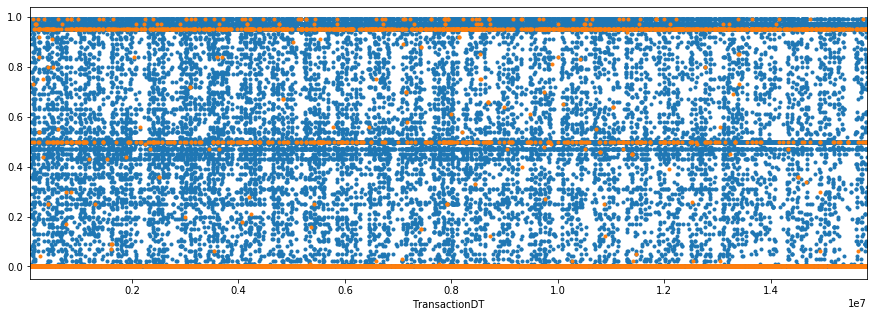

In [31]:
train['TransactionAmt_Dec'] = train['TransactionAmt'] % 1
for i, d in train.query("ProductCD == 4").groupby('isFraud'):
    d.set_index('TransactionDT')['TransactionAmt_Dec'].plot(figsize=(15, 5), style='.')

In [41]:
train['TransactionAmt_2Dec'] = train['TransactionAmt_Dec'].round(2)
test['TransactionAmt_2Dec'] = test['TransactionAmt_Dec'].round(2)

In [38]:
train.query("ProductCD == 4 and isFraud == True")['TransactionAmt_Dec'].value_counts()

0.00    7184
0.95     682
0.95     387
0.50     363
0.95      74
        ... 
0.81       1
0.30       1
0.61       1
0.12       1
0.99       1
Name: TransactionAmt_Dec, Length: 92, dtype: int64

In [43]:
train.query("ProductCD == 4 and isFraud == True")['TransactionAmt_2Dec'].value_counts()

0.00    7184
0.95    1188
0.50     363
0.99      76
0.97      33
        ... 
0.21       1
0.20       1
0.81       1
0.65       1
0.40       1
Name: TransactionAmt_2Dec, Length: 62, dtype: int64

In [49]:
train['ProductCD_W_95cents'] = False
train.loc[(train['ProductCD'] == 4) & (train['TransactionAmt_2Dec'] == 0.95),'ProductCD_W_95cents'] = True
test['ProductCD_W_95cents'] = False
test.loc[(test['ProductCD'] == 4) & (test['TransactionAmt_2Dec'] == 0.95),'ProductCD_W_95cents'] = True

In [50]:
train['ProductCD_W_00cents'] = False
train.loc[(train['ProductCD'] == 4) & (train['TransactionAmt_2Dec'] == 0.00),'ProductCD_W_00cents'] = True
test['ProductCD_W_00cents'] = False
test.loc[(test['ProductCD'] == 4) & (test['TransactionAmt_2Dec'] == 0.00),'ProductCD_W_00cents'] = True

In [51]:
train['ProductCD_W_50cents'] = False
train.loc[(train['ProductCD'] == 4) & (train['TransactionAmt_2Dec'] == 0.50),'ProductCD_W_50cents'] = True
test['ProductCD_W_50cents'] = False
test.loc[(test['ProductCD'] == 4) & (test['TransactionAmt_2Dec'] == 0.50),'ProductCD_W_50cents'] = True

In [53]:
train['ProductCD_W_50_95_0_cents'] = False
train.loc[(train['ProductCD'] == 4) &
         (train['TransactionAmt_2Dec'] == 0.95) &
         (train['TransactionAmt_2Dec'] == 0.50) &
         (train['TransactionAmt_2Dec'] == 0.00),'ProductCD_W_50_95_0_cents'] = True
test['ProductCD_W_50_95_0_cents'] = False
test.loc[(test['ProductCD'] == 4) &
         (test['TransactionAmt_2Dec'] == 0.95) &
         (test['TransactionAmt_2Dec'] == 0.50) &
         (test['TransactionAmt_2Dec'] == 0.00),'ProductCD_W_50_95_0_cents'] = True

In [54]:
train['ProductCD_W_NOT_50_95_0_cents'] = False
train.loc[(train['ProductCD'] == 4) &
         ~(train['TransactionAmt_2Dec'] == 0.95) &
         ~(train['TransactionAmt_2Dec'] == 0.50) &
         ~(train['TransactionAmt_2Dec'] == 0.00),'ProductCD_W_NOT_50_95_0_cents'] = True
test['ProductCD_W_NOT_50_95_0_cents'] = False
test.loc[(test['ProductCD'] == 4) &
         ~(test['TransactionAmt_2Dec'] == 0.95) &
         ~(test['TransactionAmt_2Dec'] == 0.50) &
         ~(test['TransactionAmt_2Dec'] == 0.00),'ProductCD_W_NOT_50_95_0_cents'] = True

In [55]:
train.groupby('ProductCD_W_NOT_50_95_0_cents')['isFraud'].count()

ProductCD_W_NOT_50_95_0_cents
False    563790
True      26750
Name: isFraud, dtype: int64

In [59]:
train.to_parquet('../../data/train_FE004.parquet')
test.to_parquet('../../data/test_FE004.parquet')

In [60]:
train.dtypes

isFraud                            int64
TransactionDT                      int64
TransactionAmt                   float64
ProductCD                          int64
card1                            float64
                                  ...   
ProductCD_W_95cents                 bool
ProductCD_W_00cents                 bool
ProductCD_W_50cents                 bool
ProductCD_W_50_95_0_cents           bool
ProductCD_W_NOT_50_95_0_cents       bool
Length: 836, dtype: object